<a href="https://colab.research.google.com/github/Saipriya0407/CSD-B-67J2/blob/master/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
data = {
    'CustomerID': [1,2,3,4,5,6,7,8,9,10],
    'Age': [19, 21, 20, 23, 31, 22, 35, 40, 29, 30],
    'Annual_Income_k': [15, 16, 17, 18, 45, 38, 60, 80, 55, 70],
    'Spending_Score': [39, 81, 6, 77, 40, 76, 6, 94, 3, 72]
}

df = pd.DataFrame(data)
print(df)

   CustomerID  Age  Annual_Income_k  Spending_Score
0           1   19               15              39
1           2   21               16              81
2           3   20               17               6
3           4   23               18              77
4           5   31               45              40
5           6   22               38              76
6           7   35               60               6
7           8   40               80              94
8           9   29               55               3
9          10   30               70              72


In [ ]:
X = df[['Annual_Income_k', 'Spending_Score']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


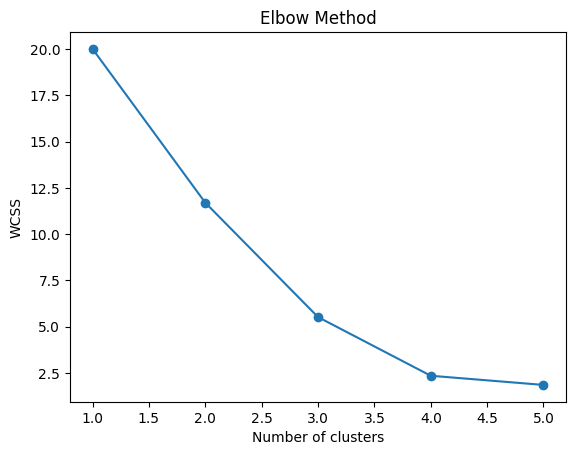

In [ ]:
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 6), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
print(df)


   CustomerID  Age  Annual_Income_k  Spending_Score  Cluster
0           1   19               15              39        2
1           2   21               16              81        0
2           3   20               17               6        2
3           4   23               18              77        0
4           5   31               45              40        2
5           6   22               38              76        0
6           7   35               60               6        2
7           8   40               80              94        1
8           9   29               55               3        2
9          10   30               70              72        1


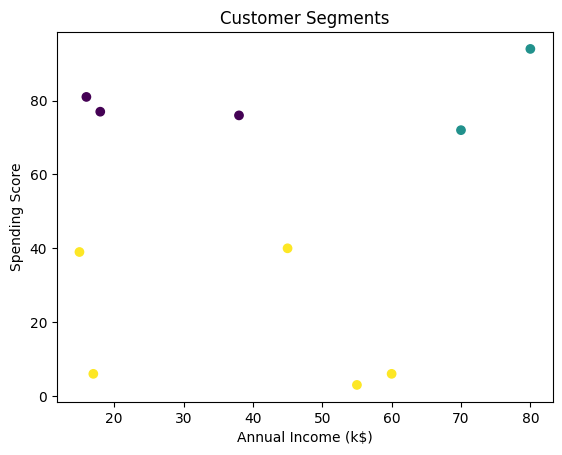

In [ ]:
plt.scatter(df['Annual_Income_k'], df['Spending_Score'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.show()
